
#Cover Page

**Developed by:**

**Mohamed Fathi - 41810059**

#Import the dataset from drive

In [288]:
!gdown --id 1eBuFpD7VAbUCGwxfG5J70G3r2_Bkhqu8

Downloading...
From: https://drive.google.com/uc?id=1eBuFpD7VAbUCGwxfG5J70G3r2_Bkhqu8
To: /content/winequality-white.csv
100% 264k/264k [00:00<00:00, 39.6MB/s]


#Importing libraries

In [289]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, classification_report, mean_absolute_error, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder

# show how the data looks like

In [290]:
data = pd.read_csv('winequality-white.csv',sep=';')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [291]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [292]:
data['quality label'] = data['quality'].apply(lambda x: 1 if x<=5 else 2 if x<=7 else 3)
print(data[['quality','quality label']].value_counts().sort_index())
data.head()

quality  quality label
3        1                  20
4        1                 163
5        1                1457
6        2                2198
7        2                 880
8        3                 175
9        3                   5
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2


# Check if all data are numbers and if there is a relations between the data


In [293]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
quality label             int64
dtype: object

In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  quality label         4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


In [295]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality label'],
      dtype='object')

# Check for the null 

In [296]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality label           0
dtype: int64

# check for the outlier

In [297]:
from scipy import stats
z = np.abs(stats.zscore(data))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


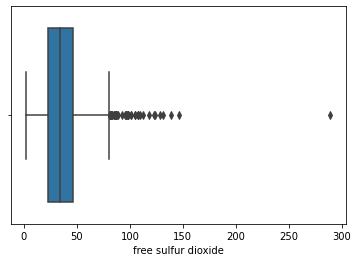

In [298]:
sns.boxplot(data['free sulfur dioxide'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


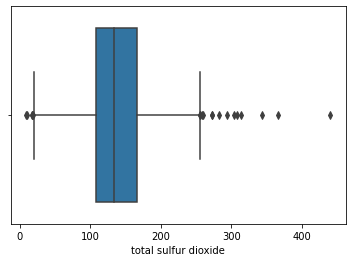

In [299]:
sns.boxplot(data['total sulfur dioxide'])

In [300]:
data.shape

(4898, 13)

In [301]:
data = data[(z < 3).all(axis=1)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


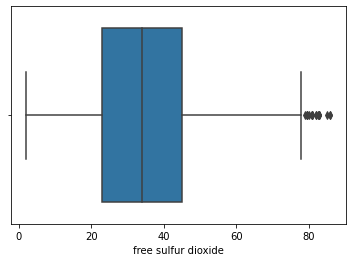

In [302]:
sns.boxplot(data['free sulfur dioxide'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


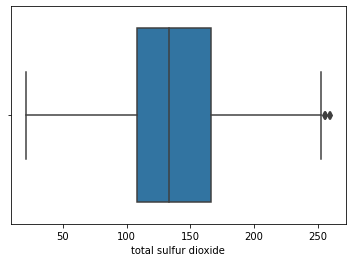

In [303]:
sns.boxplot(data['total sulfur dioxide'])

#Normalization

In [304]:
X = data.drop('quality',axis=1)
y = data['quality']

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

print(X.shape)
print(y.shape)

(4487, 12)
(4487,)


#Start Split the data and train

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42, stratify=data['quality label'])
print(len(X_train), "train +", len(X_test), "valid")

3589 train + 898 valid


**Using KNN ( k-nearest neighbors ) for trainning** 

**check for the best K** 

In [306]:
for h in range(2, 21):
  print('neighbor number ', h)
  knn = KNeighborsClassifier(n_neighbors=h, weights='distance', algorithm='auto')
  knn.fit(X_train,y_train)
  print("knn train score is : ", knn.score(X_train, y_train))
  print("knn test score is : ", knn.score(X_test, y_test))
  print('-----------------------------------------------')


neighbor number  2
knn train score is :  1.0
knn test score is :  0.8195991091314031
-----------------------------------------------
neighbor number  3
knn train score is :  1.0
knn test score is :  0.8385300668151447
-----------------------------------------------
neighbor number  4
knn train score is :  1.0
knn test score is :  0.8418708240534521
-----------------------------------------------
neighbor number  5
knn train score is :  1.0
knn test score is :  0.8374164810690423
-----------------------------------------------
neighbor number  6
knn train score is :  1.0
knn test score is :  0.8418708240534521
-----------------------------------------------
neighbor number  7
knn train score is :  1.0
knn test score is :  0.8285077951002228
-----------------------------------------------
neighbor number  8
knn train score is :  1.0
knn test score is :  0.8318485523385301
-----------------------------------------------
neighbor number  9
knn train score is :  1.0
knn test score is :  0.8

In [312]:
knn = KNeighborsClassifier(n_neighbors=16, weights='distance', algorithm='auto')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [313]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  2,  25,   0,   0,   0],
       [  0, 259,   1,   0,   0],
       [  0,   0, 380,  37,   0],
       [  0,   0,  64,  98,   0],
       [  0,   0,   2,   2,  28]])

Text(33.0, 0.5, 'Truth')

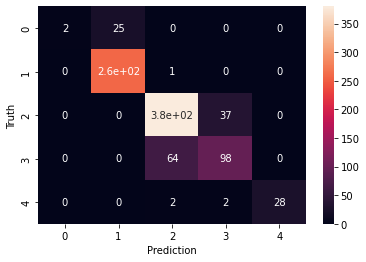

In [314]:
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

**Accuracy** 

In [315]:
var="%"
print("Accuracy: %0.1f" % (knn.score(X_test,y_test)*100), var[0])

Accuracy: 85.4 %


# Classification Report

In [316]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       1.00      0.07      0.14        27
           5       0.91      1.00      0.95       260
           6       0.85      0.91      0.88       417
           7       0.72      0.60      0.66       162
           8       1.00      0.88      0.93        32

    accuracy                           0.85       898
   macro avg       0.90      0.69      0.71       898
weighted avg       0.85      0.85      0.84       898

